<a href="https://colab.research.google.com/github/takahiromiura/class_data_analysis_II_2025/blob/main/notebooks/%E4%BF%9D%E5%AE%88%E7%9A%84%E3%81%AA%E3%82%B3%E3%83%BC%E3%83%89%E3%81%AE%E6%9B%B8%E3%81%8D%E6%96%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 保守的なコードの書き方

コードを書くのは、目的 (データ分析、自動処理、etc) を達成するためです。
目的を達成しているのであれば、原則どのようなコードでも問題はないです。
しかし、コードを書くのは一回とは限りません。
条件を変えて分析したり、分析のモデルを変える、違う変数でグラフを作成するなど、追加の作業が必要な場合があります。

この時、コードの書き方が良くないと、変更までに時間がかかる、もしくはバグが発生する可能性があります。
コードの修正のしやすさを保守性といいます。
ここでは、より良いコードを書く方法について、少しだけ触れます。

以下は、あまり良くないコードの例です (解説は最後)。

In [ ]:
from pandas import *
d = read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
d.head()
# d.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
import numpy as n

<Axes: xlabel='median_income', ylabel='median_house_value'>

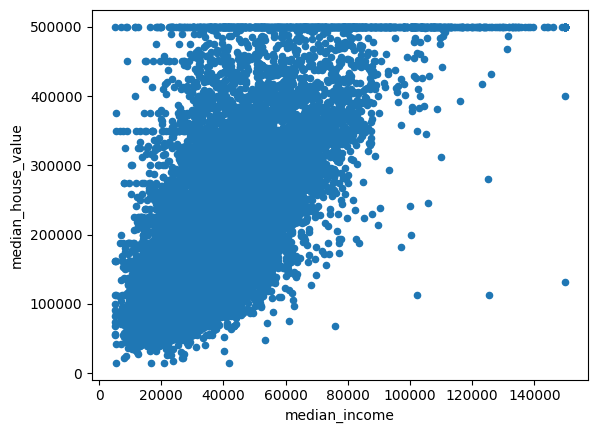

In [ ]:
d["median_income"] = d["median_income"] * 10000
d.plot.scatter(x = "median_income", y = "median_house_value")

In [ ]:
d.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,23571.0,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,25179.0,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,30313.0,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,19797.0,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,30147.0,94600.0


In [ ]:
from statsmodels.regression.linear_model import OLS
y = d["median_house_value"]
X = d[["households"]]
X["intercept"] = 1
OLS(y, X).fit().summary()

/tmp/ipython-input-1329083839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     63.55
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.66e-15
Time:                        11:16:55   Log-Likelihood:            -2.2233e+05
No. Observations:               17000   AIC:                         4.447e+05
Df Residuals:                   16998   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
households    18.4088      2.309      7.972      0.000      13.882      22.935
intercept   1.981e+05   1458.791    135.780      0.000    1.95e+05    2.01e+05
==============================================================================
Omnibus:                     2051.585   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.226
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
d1 = read_csv("/content/sample_data/california_housing_test.csv")
y = d["median_house_value"]
X = d[["households"]]
X["intercept"] = 1
OLS(y, X).fit().summary()

/tmp/ipython-input-618364682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     63.55
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.66e-15
Time:                        11:16:55   Log-Likelihood:            -2.2233e+05
No. Observations:               17000   AIC:                         4.447e+05
Df Residuals:                   16998   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
households    18.4088      2.309      7.972      0.000      13.882      22.935
intercept   1.981e+05   1458.791    135.780      0.000    1.95e+05    2.01e+05
==============================================================================
Omnibus:                     2051.585   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.226
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 解説

コードの量としては少ないですが、将来的にバグが発生しやすいコードになっています (現時点でもバグがある)。
どうすれば改善できるのか、順に述べていきます。

### `from <module> import *` を使わない

pandas の読み込みの際に、`from pandas import *` としています。
これは、`pandas` に入っている全ての関数やクラスなどを読み込んでいます。
しかし、どのようなもの (オブジェクト) が読み込まれたのかが分かりません。
他のライブラリからの読み込みなどで、オブジェクトの名前が衝突し、予期せぬ挙動になる可能性があります。

`from ~ import` を使う際は、必要なものだけを明示的に読み込んでください。

### 変数名は分かりやすく

pandas の read_csv 関数を使って、データを読み込んでいます。
このデータを `d` という変数名に格納しています。
この変数がデータであることをより分かりやすくしましょう。
ここでは `data`、または `housing_data` などが良いです。

### デッドコードは消す

`d.head(10)` というのがコメントアウトされています。
難しい処理を実装したが、後から使わなくなったことは多くあります。
そういう時にコメントアウトして残しておきたくなる気持ちはわかります。

しかし、こうした使われなくなったコード (デッドコード) はデータが変わっても修正されないため、いざ使うときに前とは挙動が変わることがあります。
死んだコードはどこか別のところにメモしておくか、バージョン管理などを使いましょう。
Colab では「版を保存して固定」と「変更履歴」を使って、前のバージョンを参照できます。

### import は最初に

途中のセルに `import` 文が入っています。
これも読み込みによって名前が衝突する可能性があるので、`import` は全て最初にまとめます。

### ライブラリ名を省略する場合は一般的なものを使う

`import numpy as n` としています。
`numpy` はちょっと長いので、`import <module> as x` として略すことができます。
しかし、`n` は `n = 100` のように変数名として使う可能性もあり、うっかり上書きしてしまうリスクがあります。
基本的には他の人と同じように略すのが良いです。
`numpy` なら `np`、`pandas` なら `pd` と略します。
こうすれば、他の人が読んでも分かりやすいです。

### できるだけ元のカラムの変更はしない

世帯収入の中央値は 10000 ドル単位の値のため、1 ドル単位に戻しています。
`d["median_income"] = d["median_income"] * 10000`

問題が起きる可能性があるのは、これが実行するたびに値が変化するということです。
特に、Colab などの場合は、何回もやりなおす可能性が高いです (例えば下のグラフの微調整をするとか)。

対処方法としては 2 つあります。

1. 新しいカラムを作る

median_income ではなく、median_income_in_dollars のように新しいカラムを作れば、何度実行しても同じ結果になります。
このときも、分かりやすい変数名が良いです。
思いつかないときは生成 AI などで聞くのも手です。

2. データを読み込んだ直後、一回だけ行う

どうしても変更したいときは、データを読み込んだ後に 1 度だけ変更します。
また、このセルはグラフ作成のセルなどとは切り離し、同じセッションで二回行わないようにします。
もしくは、データ読み込みと同じセルにすることで、再度実行するときは新しいデータを使うようにします。

### トピック毎にまとめる

head メソッドでデータの確認した後、plot でグラフを作成し、tail でまたデータを確認しています。
データの確認、グラフ作成と、トピック毎にセルの順序をまとめた方が読みやすいです。

また、Colab であればマークダウンセルを上手く使って、トピックのセクションを作っても良いです。

### データの読み込みも最初に

`d1` という新しいデータを下の方のセルで読み込んでいます。
どういうデータが必要なのかを最初に明示するためにも、コードの最初の方で必要となるデータを読み込みましょう。

### 同じような処理は関数を使う

OLS クラスを読み込んだ後、被説明変数と説明変数 (1 を含む) をデータ (`d`) から切り分けて作っています。
これを新しいデータでもやっています。
しかし、実は新しいデータを読み込んでも使っているデータは `d` の方です。

コピペを使って処理を使いまわすと、修正漏れが出るかもしれません。
こうしたことを防ぐために、関数を使って使いまわしましょう。

### やってみよう

上の解説を元に、コードを書き換えてください。

## さらに一歩先

この授業では Colab (Notebook) を使っています。
Colab Notebook やその元となる Jupyter Notebook は初学者にとっつきやすく、また文字による説明なども入れられるため、講義の資料としても扱いやすいです。
その一方で、多くの処理やその説明などを加えると、一つの Notebook が長くなり、バグが発見しづらく、また修正しにくくなります。

そのように感じたら、Python のスクリプト形式 (.py) でコードを書いてみるのをおすすめします。
最初は少しとっつきづらいように感じますが、直に良さに気づくはずです。

公式の(チュートリアル)[https://docs.python.org/ja/3/tutorial/] を見て始めるのが良いと思います。
また、Python にはたくさんの本や Web 記事などもあるので、それを参考にしてみてください。
